##En este Notebook revisaremos lo visto en clase sobre escalamiento y encodeo de variables

In [1]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 35.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 10.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=a53c1d59321e500386549d4d303a1924d17f0fd92169a28550ea755c757abfbd
  Stored in directory: /tmp/pip-ephem-wheel-cache-vtwp71f6/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=540

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from import pandas_profiling ProfileReport
from ydata_profiling import ProfileReport

# Normalización y estandarización
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encodeo
from sklearn import preprocessing


### Usaremos el data set de: California Housing

In [5]:
# puedes agregar la dirección que quieras, siempre y cuando haga referencia al dataset.
# Debes poner atencion al separador. El parametro "sep" indica como se separan los datosen el dataset.

url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
df_housing = pd.read_csv(url, sep=",")
df_housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [6]:
# Algunas estadísticas básicas de sólo las variables numéricas
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [7]:
# Revisamos el tipo de datos
df_housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

**se pueden calcular muchas otras cosas, pero usamos pandas profiling que hace muchas cosas en un solo paso**

In [8]:
ProfileReport(df_housing)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Normalización y estandarización

In [9]:
# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
scaler.fit(df_housing)

# Finalmente aplicamos el escalamiento
array_scaler = scaler.transform(df_housing)
array_scaler

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.07599796,
        -1.25254316, -1.21055773],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.09940441,
        -1.08148298, -1.09674535],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.99925206,
        -1.17010515, -1.04846131],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.11760942,
        -0.44666313, -0.89412482],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.06039367,
        -0.99778717, -1.04759909],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.60134255,
        -0.45536288, -0.97172417]])

Se ve que entrega los datos más "desordenados". Esto pasa por que lo que entrega es un arreglo (array). Lo pasaremos a DataFrame

In [10]:
df_scaler = pd.DataFrame(array_scaler)
df_scaler

0         1         2         3         4         5         6  \
0      2.619365 -0.671520 -1.079671  1.361695  1.764204 -0.361184 -0.075998   
1      2.539569 -0.573264 -0.761872  2.296608  3.230441 -0.261865 -0.099404   
2      2.494683 -0.905463 -0.920772 -0.882462 -0.866956 -0.955354 -0.999252   
3      2.489696 -0.928857 -1.159121 -0.524186 -0.480230 -0.796793 -0.715774   
4      2.489696 -0.961609 -0.682422 -0.545747 -0.506328 -0.701830 -0.622148   
...         ...       ...       ...       ...       ...       ...       ...   
16995 -2.342963  2.318265  1.859971 -0.195728 -0.344995 -0.455275 -0.343872   
16996 -2.347950  2.369733  0.588774 -0.135174 -0.027073 -0.205236 -0.094203   
16997 -2.362912  2.907801 -0.920772  0.015292 -0.019955 -0.161675 -0.117609   
16998 -2.362912  2.889085 -0.761872  0.012999  0.029868 -0.114630 -0.060394   
16999 -2.387848  2.299550  1.859971 -0.377848 -0.568015 -0.543268 -0.601343   

              7         8  
0     -1.252543 -1.210558  
1     -1.081483 -1.096745  
2     -1.170105 -1.048461  
3     -0.362600 -1.154514  
4     -1.026454 -1.222629  
...         ...       ...  
16995 -0.799999 -0.826872  
16996 -0.715727 -1.106230  
16997 -0.446663 -0.894125  
16998 -0.997787 -1.047599  
16999 -0.455363 -0.971724  

[17000 rows x 9 columns]

**Ahora el problema es que las columnas perdieron sus nombres**

Podemos recuperar los nombres

In [11]:
df_scaler.columns = df_housing.columns
df_scaler

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2.619365 -0.671520           -1.079671     1.361695        1.764204   
1       2.539569 -0.573264           -0.761872     2.296608        3.230441   
2       2.494683 -0.905463           -0.920772    -0.882462       -0.866956   
3       2.489696 -0.928857           -1.159121    -0.524186       -0.480230   
4       2.489696 -0.961609           -0.682422    -0.545747       -0.506328   
...          ...       ...                 ...          ...             ...   
16995  -2.342963  2.318265            1.859971    -0.195728       -0.344995   
16996  -2.347950  2.369733            0.588774    -0.135174       -0.027073   
16997  -2.362912  2.907801           -0.920772     0.015292       -0.019955   
16998  -2.362912  2.889085           -0.761872     0.012999        0.029868   
16999  -2.387848  2.299550            1.859971    -0.377848       -0.568015   

       population  households  median_income  median_house_value  
0       -0.361184   -0.075998      -1.252543           -1.210558  
1       -0.261865   -0.099404      -1.081483           -1.096745  
2       -0.955354   -0.999252      -1.170105           -1.048461  
3       -0.796793   -0.715774      -0.362600           -1.154514  
4       -0.701830   -0.622148      -1.026454           -1.222629  
...           ...         ...            ...                 ...  
16995   -0.455275   -0.343872      -0.799999           -0.826872  
16996   -0.205236   -0.094203      -0.715727           -1.106230  
16997   -0.161675   -0.117609      -0.446663           -0.894125  
16998   -0.114630   -0.060394      -0.997787           -1.047599  
16999   -0.543268   -0.601343      -0.455363           -0.971724  

[17000 rows x 9 columns]

Finalmente, corroboramos el resultado:

In [12]:
df_scaler.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  1.700000e+04  1.700000e+04        1.700000e+04  1.700000e+04   
mean  -6.633961e-15  2.674984e-17       -7.606987e-17 -9.028072e-17   
std    1.000029e+00  1.000029e+00        1.000029e+00  1.000029e+00   
min   -2.387848e+00 -1.443531e+00       -2.191968e+00 -1.211838e+00   
25%   -1.111108e+00 -7.931704e-01       -8.413218e-01 -5.420770e-01   
50%    5.346887e-01 -6.434471e-01        3.262582e-02 -2.370147e-01   
75%    7.790646e-01  9.801141e-01        6.682241e-01  2.328499e-01   
max    2.619365e+00  2.959268e+00        1.859971e+00  1.619047e+01   

       total_bedrooms    population    households  median_income  \
count    1.700000e+04  1.700000e+04  1.700000e+04   1.700000e+04   
mean    -8.693699e-17  7.356207e-17  2.006238e-17  -3.644666e-16   
std      1.000029e+00  1.000029e+00  1.000029e+00   1.000029e+00   
min     -1.277408e+00 -1.242856e+00 -1.300935e+00  -1.773323e+00   
25%     -5.751323e-01 -5.572079e-01 -5.701340e-01  -6.903217e-01   
50%     -2.500927e-01 -2.287590e-01 -2.398431e-01  -1.776521e-01   
75%      2.582266e-01  2.538954e-01  2.705474e-01   4.629850e-01   
max      1.401132e+01  2.984131e+01  1.451402e+01   5.825963e+00   

       median_house_value  
count        1.700000e+04  
mean         1.337492e-17  
std          1.000029e+00  
min         -1.658056e+00  
25%         -7.578949e-01  
50%         -2.319437e-01  
75%          4.974902e-01  
max          2.523704e+00

### ¿Cómo sabemos que lo hizo bien?

![](https://i.stack.imgur.com/Z7ATR.png)

In [17]:
print("SD\con estandarización = {}\sin estandarización = {}".format(np.std(df_scaler.median_income),
                                                                    np.std(df_housing.median_income)))
print("Media\con estandarización = {}\sin estandarización = {}".format(np.mean(df_scaler.median_income),
                                                                    np.mean(df_housing.median_income)))

SD\con estandarización = 1.0\sin estandarización = 1.9081003953032116
Media\con estandarización = -3.644666268134161e-16\sin estandarización = 3.8835781000000007


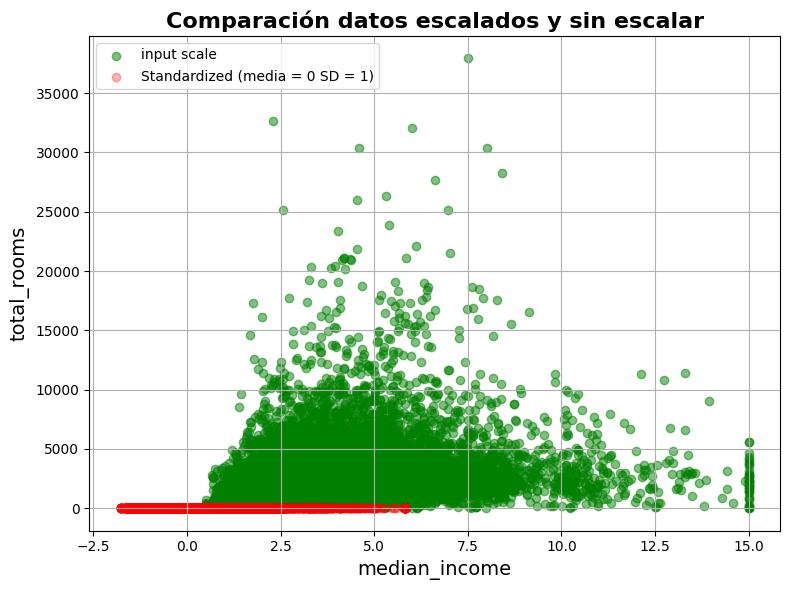

In [16]:

def plot(df_unscaled : pd.DataFrame, df_scaler : pd.DataFrame, x_column : str, y_column : str,
         min_max : bool = False, df_minmax : pd.DataFrame = None):
    plt.figure(figsize=(8,6))

    plt.scatter(df_unscaled[x_column], df_unscaled[y_column],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_scaler[x_column], df_scaler[y_column], color='red',
            label='Standardized (media = 0 SD = 1)', alpha=0.3)

    if min_max:
      plt.scatter(df_minmax[x_column], df_minmax[y_column], color='blue',
                  label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Comparación datos escalados y sin escalar', fontsize=16, fontweight="bold")
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot(df_unscaled=df_housing, df_scaler = df_scaler, x_column = "median_income", y_column = "total_rooms")
plt.show()

## Tarea: hacer la normalización con la función MinMaxScaler

#Encodeo

Veremos Label Encoder, la cual cambia valores categóricos de una variable a valores numéricos.

Para esto usaremos un datat set pequeño para ver los resultados más facilmente

In [19]:
datos = {'estudiante': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'],
         'Primera prueba': [7, 8,7,7,8.5, 10],
         'Segunda prueba': [10,9,10,4,10,6.7],
         'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'],
         'DNI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)
df

estudiante  Primera prueba  Segunda prueba observaciones       DNI
0           Zutano             7.0            10.0       ninguna  23000000
1          Mengano             8.0             9.0         libre  12389100
2           Zutano             7.0            10.0       ninguna  23000000
3             Pepe             7.0             4.0       ninguna     99999
4  Fulanito, Cosme             8.5            10.0         libre      1001
5            Maria            10.0             6.7        oyente  30406011

In [20]:
# Creamos el objeto
le = preprocessing.LabelEncoder()

# Tomamos un variable categórica, en este caso usaremos la variable: "observaciones"
data = df['observaciones']
data

0    ninguna
1      libre
2    ninguna
3    ninguna
4      libre
5     oyente
Name: observaciones, dtype: object

In [21]:
# Ahora aplicamos el "entrenamiento", que vendría siendo el obtener los parámetros del modelo
le.fit(data)

data_transformada = le.transform(data)
data_transformada

array([1, 0, 1, 1, 0, 2])

In [22]:
# Ahora hacemos el cambio a los datos
df['observaciones'] = data_transformada
df

estudiante  Primera prueba  Segunda prueba  observaciones       DNI
0           Zutano             7.0            10.0              1  23000000
1          Mengano             8.0             9.0              0  12389100
2           Zutano             7.0            10.0              1  23000000
3             Pepe             7.0             4.0              1     99999
4  Fulanito, Cosme             8.5            10.0              0      1001
5            Maria            10.0             6.7              2  30406011

## ¿Te preguntaste si la variable categórica era nominal u ordinal?

## Tarea: aplicar OneHotEncoder a la variable categórica.